In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

Using TensorFlow backend.


In [2]:
from keras.layers import LSTM
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.5484 - acc: 0.7425 - val_loss: 0.3681 - val_acc: 0.8556
Epoch 2/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.3155 - acc: 0.8740 - val_loss: 0.3484 - val_acc: 0.8638
Epoch 3/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.2499 - acc: 0.9068 - val_loss: 0.5829 - val_acc: 0.7858
Epoch 4/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.2105 - acc: 0.9213 - val_loss: 0.3323 - val_acc: 0.8640
Epoch 5/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.1852 - acc: 0.9333 - val_loss: 0.3250 - val_acc: 0.8874
Epoch 6/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.1679 - acc: 0.9406 - val_loss: 0.3065 - val_acc: 0.8902
Epoch 7/10
20000/20000 [==========

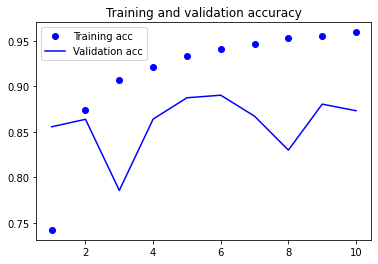

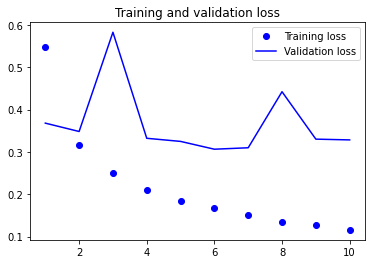

In [3]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()